## Early Stopping Callback

In [1]:
# build binary classification model from 3.4
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers

# load IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# vectorize input data from list of integers to one-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# build network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile network
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

2023-10-08 12:04:13.516317: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-08 12:04:13.516389: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-08 12:04:13.516412: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-08 12:04:13.516602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-08 12:04:13.516872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
# add early stopping callback and train model
import tensorflow.keras as keras

# model will stop training after validation accuracy does not improve for 2 epochs
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=1,
    )
]

# train network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

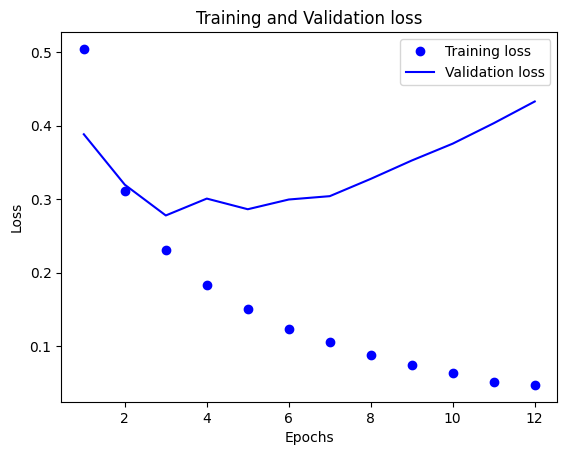

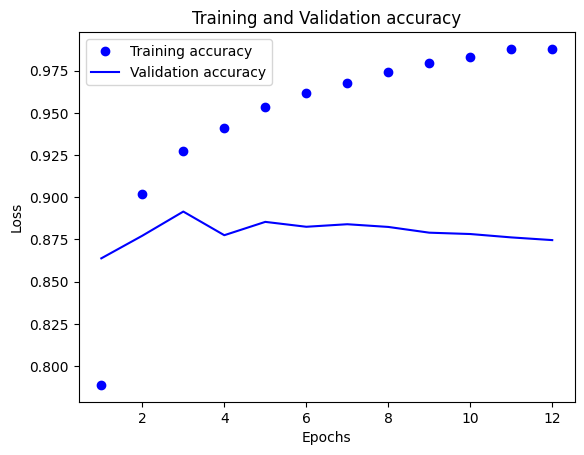

In [3]:
# plot training and validation loss
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# plot training and validation accuracy
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## TensorBoard

In [8]:
# build IMDB convnet model similar to 6.4
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 98, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
# add tensorboard callback to log data, begin training model, and launch tensorboard to view data

# use terminal to create directory for log files:
# mkdir my_log_dir

# callback records activation histogram and embedding data every 1 epoch at 'my_log_dir'
callbacks = [
  keras.callbacks.TensorBoard(
    log_dir='my_log_dir',
    histogram_freq=1,
    embeddings_freq=1
  )
]

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=callbacks)

# use terminal to launch tensorboard and view logged data at http://localhost:6006:
# tensorboard --logdir=my_log_dir

## Keras Built-in Model Graph Visualization

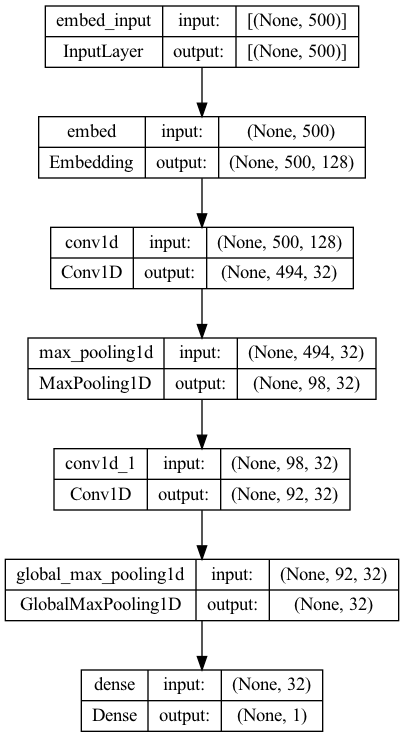

In [7]:
# requires: pydot, pydotplus
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png')